## Import Libraries

In [69]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [133]:
df = pd.read_csv("final_data.csv")

In [134]:
df.shape

(10754, 22)

In [135]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [136]:
df.columns


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

Data Profiling

In [137]:
df.shape

(10754, 22)

In [138]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [139]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [140]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [141]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [142]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [143]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [144]:
df.nunique()

player                 10754
team                     374
name                   10584
position                  16
height                    47
age                       30
appearance               108
goals                   5329
assists                 5065
yellow cards            6291
second yellow cards     1095
red cards               1219
goals conceded           742
clean sheets             635
minutes played          5036
days_injured             772
games_injured            154
award                     46
current_value            128
highest_value            156
position_encoded           4
winger                     2
dtype: int64

In [145]:
# Dropping irrelevant columns
df = df.drop(columns=['player' , 'name','clean sheets' , 'goals conceded'])
df = df[df['position'] != 'Goalkeeper']
# Display the first few rows to confirm the columns are removed
df.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


In [147]:
df.columns
df.shape


(9525, 18)

In [148]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", numerical_columns)

# Selecting categorical columns
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical columns:\n", categorical_features)


Numerical columns:
 Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')
Categorical columns:
 Index(['team', 'position'], dtype='object')


In [149]:
for i in categorical_features:
   print (df[i].value_counts())

team
Daejeon Hana Citizen      41
Jeonbuk Hyundai Motors    41
FC Seoul                  41
Gangwon FC                39
Daegu FC                  37
                          ..
Swansea City              19
FC Barcelona              19
Aston Villa               19
Hatayspor                 10
Gaziantep FK               5
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [150]:
df['team'].unique

<bound method Series.unique of 3               Manchester United
4               Manchester United
5               Manchester United
6               Manchester United
7               Manchester United
                   ...           
10749    Western Sydney Wanderers
10750    Western Sydney Wanderers
10751    Western Sydney Wanderers
10752    Western Sydney Wanderers
10753    Western Sydney Wanderers
Name: team, Length: 9525, dtype: object>

In [151]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 10].index)]


In [152]:
df.shape

(9520, 18)

In [153]:
df['team'].value_counts()

team
Jeonbuk Hyundai Motors    41
Daejeon Hana Citizen      41
FC Seoul                  41
Gangwon FC                39
Daegu FC                  37
                          ..
Aston Villa               19
Olympique Marseille       19
Ümraniyespor              19
FC Barcelona              19
Hatayspor                 10
Name: count, Length: 373, dtype: int64

- remove the outliers

In [154]:
df = df[(df['height']<=200) & (df['height']>=165)]

In [155]:
df = df[(df['age']<40) & (df['age']>=16)]

In [156]:
df = df[(df['goals']<6)]

In [157]:
df = df[(df['yellow cards']<=12)]

In [158]:
df = df[(df['red cards']<=3)]

In [159]:
df = df[(df['days_injured']<=1570)]

In [160]:
df = df[(df['games_injured']<200)]

In [161]:
df.shape

(9434, 18)

In [162]:
df['age'].max()

np.float64(39.0)

In [163]:
df.shape

(9434, 18)

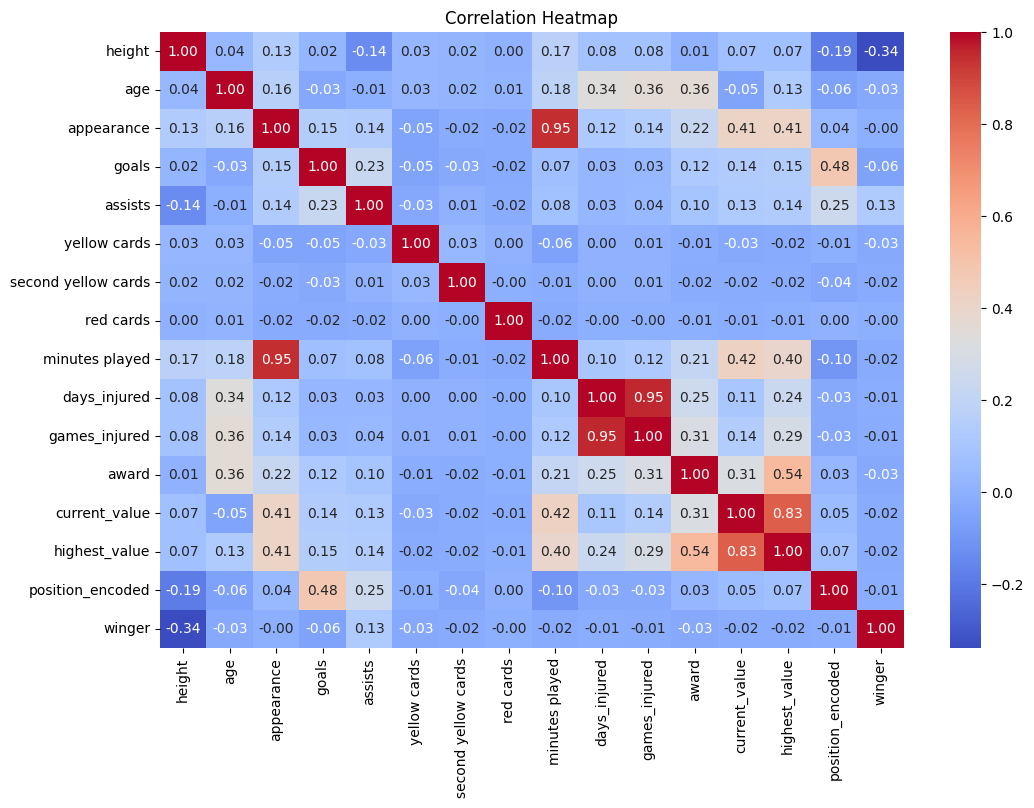

In [164]:
# Select only numerical columns from your DataFrame (replace 'df' with the name of your DataFrame if needed)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [165]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,51,21,40000000,80000000,2,0


In [166]:
categorical_features

Index(['team', 'position'], dtype='object')

In [167]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [168]:
df.shape

(9434, 404)

In [169]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,...,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,...,False,True,False,False,False,False,False,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,...,False,True,False,False,False,False,False,False,False,False


In [170]:
# Calculate the 35th and 75th percentiles of current_value
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize current_value
def categorize_value(value):
    if value < p35:
        return 'Low_Value'
    elif value < p75:
        return 'Medium_Value'
    else:
        return 'High_Value'

# Apply the function to create a new classification column
df['current_value_category'] = df['current_value'].apply(categorize_value)

# Optionally drop the original current_value column if not needed
df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())


current_value_category
Medium_Value    3739
Low_Value       3161
High_Value      2534
Name: count, dtype: int64


In [171]:
p35, p75

(np.float64(500000.0), np.float64(3000000.0))

In [172]:
df['current_value_category'] 

3          High_Value
4          High_Value
5          High_Value
6          High_Value
7        Medium_Value
             ...     
10749       Low_Value
10750       Low_Value
10751       Low_Value
10752       Low_Value
10753       Low_Value
Name: current_value_category, Length: 9434, dtype: object

In [173]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category'])  

#### 3. Feature selection

In [109]:
#sns.heatmap(df.corr(), annot=True);

In [174]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
age                               0.106863
team_Fortaleza Esporte Clube      0.048170
team_Mamelodi Sundowns FC         0.044106
team_Vitória Guimarães SC         0.041874
                                    ...   
goals                            -0.076716
award                            -0.144225
minutes played                   -0.253297
appearance                       -0.256254
highest_value                    -0.416038
Name: current_value_category_encoded, Length: 404, dtype: float64


In [175]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'minutes played', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [176]:
selected_features

Index(['appearance', 'minutes played', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [177]:
df = df[selected_features]
df.head()

,appearance,minutes played,highest_value,current_value_category_encoded
3,82,6408,50000000,0
4,63,5031,80000000,0
5,68,4762,70000000,0
6,70,5471,35000000,0
7,8,416,20000000,2


#### 4. Prepare train and test data

In [178]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)
y = df['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
X.shape

(9434, 3)

## Buliding the Model

In [180]:
model = KNeighborsClassifier()

In [181]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [182]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [183]:
grid_search.best_params_

{'n_neighbors': 9}

In [184]:
model = grid_search.best_estimator_

## Test the Model

In [185]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model 

In [186]:
# our benchmark model
base_model = round(df['current_value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

np.float64(33.51)

1. Accuracy

In [187]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7993904862859414

In [188]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7514573396926338

In [189]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[404,   0,  87],
       [ 18, 476, 136],
       [110, 118, 538]])

In [190]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84      2043
           1       0.86      0.78      0.82      2531
           2       0.76      0.76      0.76      2973

    accuracy                           0.80      7547
   macro avg       0.80      0.81      0.80      7547
weighted avg       0.80      0.80      0.80      7547

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       491
           1       0.80      0.76      0.78       630
           2       0.71      0.70      0.70       766

    accuracy                           0.75      1887
   macro avg       0.76      0.76      0.76      1887
weighted avg       0.75      0.75      0.75      1887



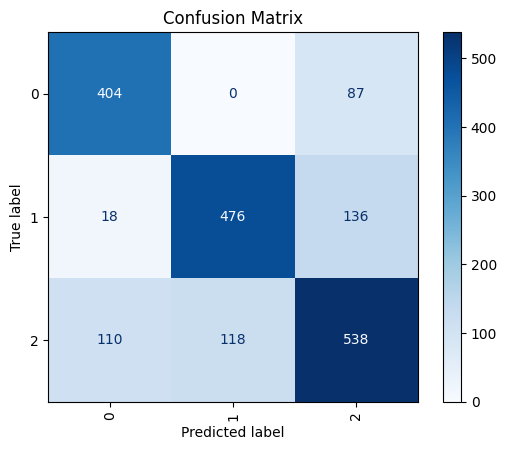

In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [192]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.76


In [193]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.76


In [194]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.76


In [197]:
# Check the number of features expected by the model
print("Number of features expected by the model:", model.n_features_in_)

Number of features expected by the model: 3


In [199]:
# Check if the scaler object has the feature names attribute
if hasattr(scaler, "feature_names_in_"):
    print("Feature names used for training:", scaler.feature_names_in_)


Feature names used for training: ['appearance' 'minutes played' 'highest_value']


In [196]:
import joblib

# Save the model and scaler using joblib
joblib.dump(model, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']